In [4]:
from scipy.stats import norm, uniform
from scipy.integrate import simpson
import numpy as np
import matplotlib.pyplot as plt

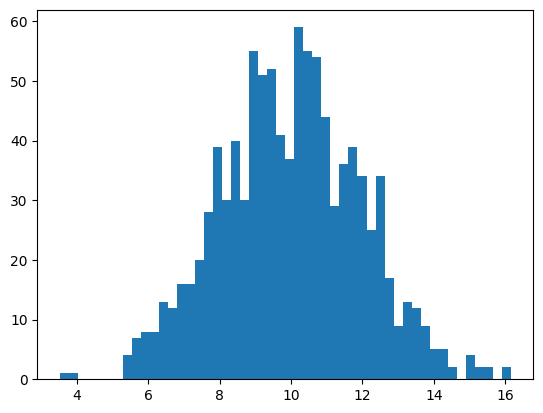

In [5]:
plt.hist(norm.rvs(loc=10, scale=2, size=1000), bins=50);

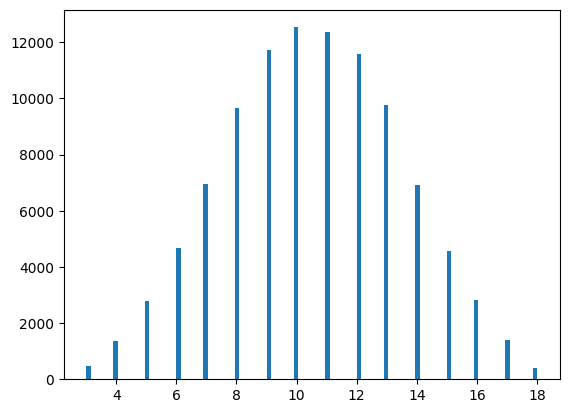

In [6]:
samples = np.ceil(uniform.rvs(loc=0, scale=6, size=(100000, 3))).sum(axis=1)
plt.hist(samples, bins=100);